<a href="https://colab.research.google.com/github/soumyadeepdas28/Cats_vs_Dogs_Classification_Using_Deep_Learning/blob/main/cat_v_dog_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:06<00:00, 279MB/s]
100% 1.06G/1.06G [00:06<00:00, 174MB/s]


In [ ]:
import zipfile 
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import os
path = 'train'
classes = os.listdir(path)
classes


['cats', 'dogs']

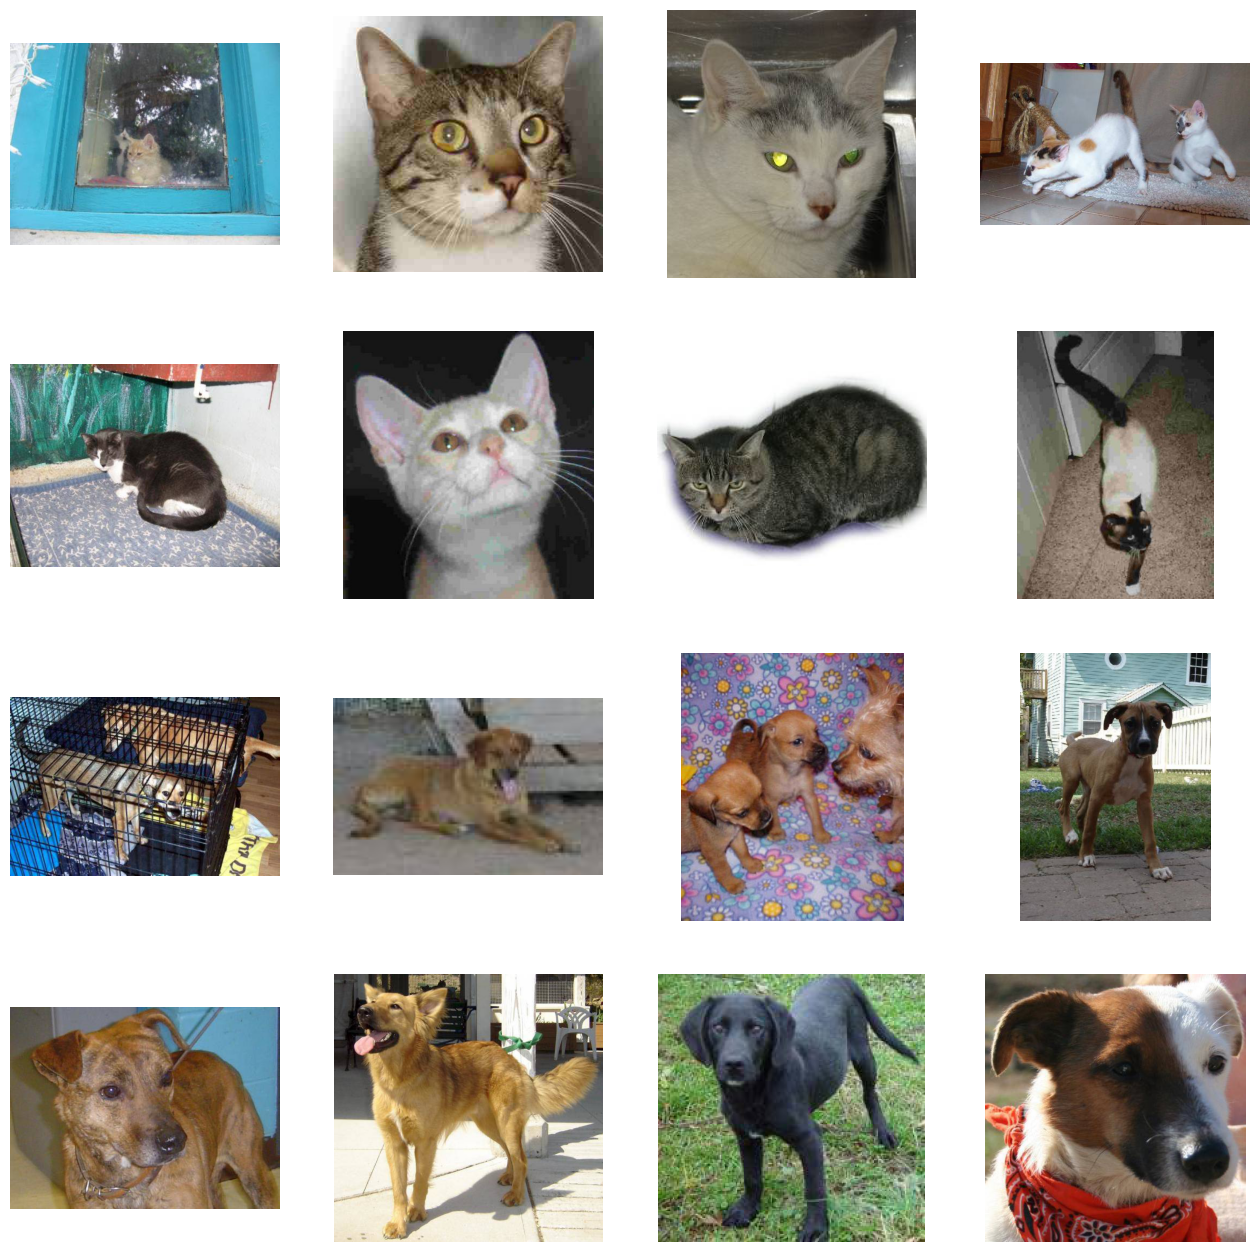

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(16, 16)

cat_dir = os.path.join('/content/train/cats')
dog_dir = os.path.join('/content/train/dogs')
cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)

pic_index = 210

cat_images = [os.path.join(cat_dir, fname)
			for fname in cat_names[pic_index-8:pic_index]]
dog_images = [os.path.join(dog_dir, fname)
			for fname in dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(cat_images + dog_images):
	sp = plt.subplot(4, 4, i+1)
	sp.axis('Off')

	img = mpimg.imread(img_path)
	plt.imshow(img)

plt.show()


In [ ]:
file_names = os.listdir('/content/train/')
print(file_names)

['cats', 'dogs']


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
import numpy as np
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/dogs_vs_cats/train',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(150, 150),
    
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/dogs_vs_cats/test',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(150, 150),
   
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
model = keras.models.Sequential([
keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape = [150,150,3]),
keras.layers.MaxPooling2D(),
keras.layers.Conv2D(32, (2, 2), activation='relu'),
keras.layers.MaxPooling2D(),

keras.layers.SeparableConv2D(64, 3, activation='relu', padding='same'),
keras.layers.SeparableConv2D(64, 3, activation='relu', padding='same'),
keras.layers.BatchNormalization(),
keras.layers.MaxPool2D(),

keras.layers.SeparableConv2D(128, 3, activation='relu', padding='same'),
keras.layers.SeparableConv2D(128, 3, activation='relu', padding='same'),
keras.layers.BatchNormalization(),
keras.layers.MaxPool2D(),
keras.layers.Dropout(0.2),

keras.layers.SeparableConv2D(128, 3, activation='relu', padding='same'),
keras.layers.SeparableConv2D(128, 3, activation='relu', padding='same'),
keras.layers.BatchNormalization(),
keras.layers.MaxPool2D(),
keras.layers.Dropout(0.2),

keras.layers.SeparableConv2D(256, 3, activation='relu', padding='same'),
keras.layers.SeparableConv2D(256, 3, activation='relu', padding='same'),
keras.layers.BatchNormalization(),
keras.layers.MaxPool2D(),
keras.layers.Dropout(0.2),

keras.layers.SeparableConv2D(256, 3, activation='relu', padding='same'),
keras.layers.SeparableConv2D(256, 3, activation='relu', padding='same'),
keras.layers.BatchNormalization(),
keras.layers.MaxPool2D(),
keras.layers.Dropout(0.2),

keras.layers.Flatten(),

keras.layers.Dense(512, activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Dropout(0.7),

keras.layers.Dense(512, activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Dropout(0.7),

keras.layers.Dense(128, activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Dropout(0.5),

keras.layers.Dense(64, activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Dropout(0.3),

keras.layers.Dense(64, activation='relu'),
keras.layers.BatchNormalization(),
keras.layers.Dropout(0.3),

keras.layers.Dense(2, activation ='softmax')])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 73, 73, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 separable_conv2d (Separable  (None, 36, 36, 64)       2400      
 Conv2D)                                                         
                                                        

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=3,
                                            restore_best_weights=True)

In [ ]:
model.compile(optimizer='adam',
loss=tf.losses.CategoricalCrossentropy(),
metrics=[keras.metrics.AUC(name='auc')])

In [ ]:
result = model.fit(train_ds, validation_data=validation_ds, epochs=50)

Epoch 1/50
625/625 [==============================] - 57s 55ms/step - loss: 0.8171 - auc: 0.5261 - val_loss: 0.6940 - val_auc: 0.5417
Epoch 2/50
625/625 [==============================] - 34s 55ms/step - loss: 0.6655 - auc: 0.6390 - val_loss: 0.6561 - val_auc: 0.6528
Epoch 3/50
625/625 [==============================] - 34s 54ms/step - loss: 0.6003 - auc: 0.7428 - val_loss: 0.5130 - val_auc: 0.8303
Epoch 4/50
625/625 [==============================] - 34s 55ms/step - loss: 0.5082 - auc: 0.8322 - val_loss: 0.8102 - val_auc: 0.7381
Epoch 5/50
625/625 [==============================] - 34s 54ms/step - loss: 0.4344 - auc: 0.8815 - val_loss: 0.4843 - val_auc: 0.8653
Epoch 6/50
625/625 [==============================] - 33s 52ms/step - loss: 0.3725 - auc: 0.9145 - val_loss: 0.3265 - val_auc: 0.9350
Epoch 7/50
625/625 [==============================] - 34s 54ms/step - loss: 0.3258 - auc: 0.9351 - val_loss: 0.3433 - val_auc: 0.9309
Epoch 8/50
625/625 [==============================] - 33s 52ms

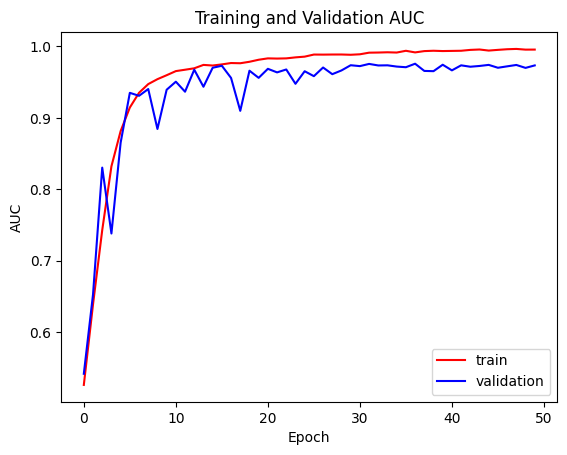

In [ ]:
import matplotlib.pyplot as plt

# Plotting the AUC curves
plt.plot(result.history['auc'], color='red', label='train')
plt.plot(result.history['val_auc'], color='blue', label='validation')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.title('Training and Validation AUC')
plt.show()

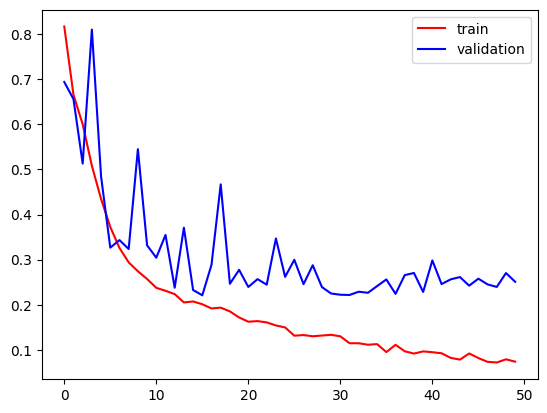

In [ ]:
plt.plot(result.history['loss'],color='red',label='train')
plt.plot(result.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

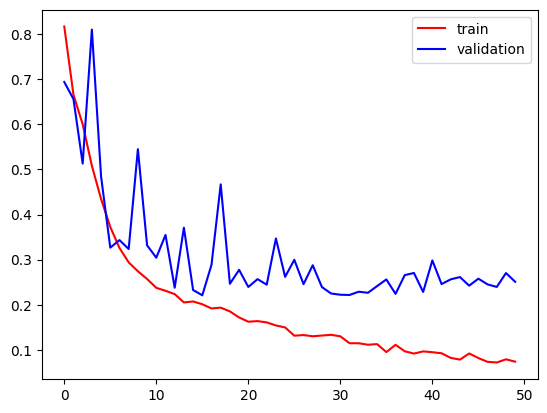

In [ ]:
plt.plot(result.history['loss'],color='red',label='train')
plt.plot(result.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

CAT

1/1 [==============================] - 0s 22ms/step


(1, 2)

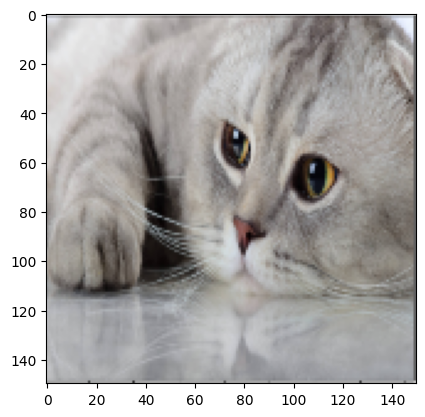

In [ ]:
test_img = cv2.imread('/content/Screenshot 2023-03-31 235404.png')
test_img = cv2.resize(test_img,(150,150))
plt.imshow(test_img)
test_input = test_img.reshape((1,150,150,3))
prediction = model.predict(test_input)
prediction.shape


In [ ]:
prediction

array([[0.99814856, 0.00185146]], dtype=float32)

In [ ]:
predicted_label_index = np.argmax(prediction)
predicted_label_index
print(predicted_label_index)
print()

0



DOG

1/1 [==============================] - 0s 21ms/step


(1, 2)

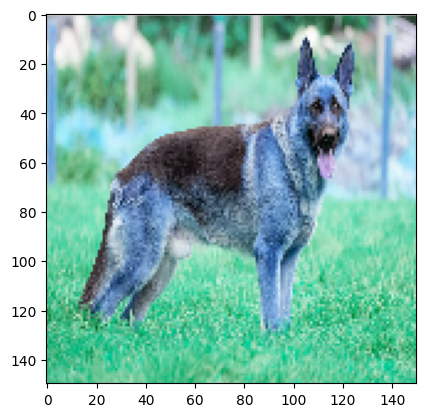

In [ ]:
test_img = cv2.imread('/content/Screenshot 2023-04-16 105555.png')
test_img = cv2.resize(test_img,(150,150))
plt.imshow(test_img)
test_input = test_img.reshape((1,150,150,3))
prediction = model.predict(test_input)
prediction.shape

In [ ]:
prediction

array([[1.9574287e-05, 9.9998045e-01]], dtype=float32)

In [ ]:
predicted_label_index = np.argmax(prediction)
predicted_label_index
print(predicted_label_index)
print()

1



In [ ]:
!mkdir model_vers_1

In [ ]:
model.save('/content/model_vers_1/cats_and_dogs_classification_model.h5')

In [ ]:
from google.colab import files

# Path to the saved model folder
model_folder_path = '/content/model_vers_1'

# Create a zip file of the model folder
!zip -r cat_and_dog_classification_model.zip $model_folder_path

# Download the zip file
files.download('cat_and_dog_classification_model.zip')

  adding: content/model_vers_1/ (stored 0%)
  adding: content/model_vers_1/cats_and_dogs_classification_model.h5 (deflated 9%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>